In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import os


In [3]:
import joblib
import pandas as pd

data_kcat = joblib.load('/Users/pinchichen/2025S lab/AI drug project/Catpred/dataset/km/km_with_features.joblib')
data_kcat.head()

,Sequence,sequence_source,uniprot,Smiles,value,ec,taxonomy_id,log10_value,log10km_mean,metabolite_features,protein_features
0,MGQEKLYIEKELSWLSFNERVLQEAADKSNPLIERMRFLGIYSNNL...,sabio,P0A7B1,Nc1nc2c(ncn2C2OC(COP(=O)(O)OP(=O)(O)O)C(O)C2O)...,0.6300,2.7.4.1,562,-0.200659,-0.200659,"[0.25370342, -0.3417107, -0.28024313, -0.04292...","[-0.06592023, -0.062496405, -0.012068139, 0.06..."
1,MSQQPHTEQFPKNQPPLAERLASARQLVTKAISAVPPHPEPLPSPN...,brenda,A0A0S2SWE4,CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)O,0.0264,1.13.11.60,474922,-1.578396,-1.553572,"[0.61067283, 0.46248585, -0.051634412, -0.7397...","[0.16962084, -0.09671225, 0.116663285, 0.05065..."
2,MSAAADRLNLTSGHLNAGRKRSSSSVSLKAVEKPFKVTVIGSGNWG...,uniprot_search,A0A060KZ16,O=C(CO)COP(=O)(O)O,0.6100,1.1.1.8,114524,-0.214670,-0.214670,"[0.29938427, -0.0972216, -0.3334697, -0.721026...","[0.0933136, -0.117130496, 0.0676241, 0.0187789..."
3,MLAEKTRSIIKATVPVLEQQGTVITRTFYKNMLTEHTELLNIFNRT...,sabio,P39676,NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4c...,0.0280,1.14.12.17,4932,-1.552842,-1.552842,"[0.639636, -0.14536878, -0.52627945, 0.1240742...","[-0.02827879, -0.04372119, 0.03182794, 0.19197..."
4,MASAERVPVSFNKPGRVPFGEVQGYAPGHIPAYSNKHDHFFSGERS...,uniprot_search,O60993,Nc1ncnc2c1ncn2[C@H]1O[C@H](COP(=O)([O-])OP(=O)...,0.4000,6.3.1.9,5656,-0.397940,-0.397940,"[0.25855744, 0.43888408, -0.7136499, 0.0234168...","[0.074476704, -0.050253637, 0.05497695, 0.1402..."


In [4]:
data_kcat.rename(columns={'log10km_mean':'label'},inplace=True)
data_kcat.head()

,Sequence,sequence_source,uniprot,Smiles,value,ec,taxonomy_id,log10_value,label,metabolite_features,protein_features
0,MGQEKLYIEKELSWLSFNERVLQEAADKSNPLIERMRFLGIYSNNL...,sabio,P0A7B1,Nc1nc2c(ncn2C2OC(COP(=O)(O)OP(=O)(O)O)C(O)C2O)...,0.6300,2.7.4.1,562,-0.200659,-0.200659,"[0.25370342, -0.3417107, -0.28024313, -0.04292...","[-0.06592023, -0.062496405, -0.012068139, 0.06..."
1,MSQQPHTEQFPKNQPPLAERLASARQLVTKAISAVPPHPEPLPSPN...,brenda,A0A0S2SWE4,CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)O,0.0264,1.13.11.60,474922,-1.578396,-1.553572,"[0.61067283, 0.46248585, -0.051634412, -0.7397...","[0.16962084, -0.09671225, 0.116663285, 0.05065..."
2,MSAAADRLNLTSGHLNAGRKRSSSSVSLKAVEKPFKVTVIGSGNWG...,uniprot_search,A0A060KZ16,O=C(CO)COP(=O)(O)O,0.6100,1.1.1.8,114524,-0.214670,-0.214670,"[0.29938427, -0.0972216, -0.3334697, -0.721026...","[0.0933136, -0.117130496, 0.0676241, 0.0187789..."
3,MLAEKTRSIIKATVPVLEQQGTVITRTFYKNMLTEHTELLNIFNRT...,sabio,P39676,NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4c...,0.0280,1.14.12.17,4932,-1.552842,-1.552842,"[0.639636, -0.14536878, -0.52627945, 0.1240742...","[-0.02827879, -0.04372119, 0.03182794, 0.19197..."
4,MASAERVPVSFNKPGRVPFGEVQGYAPGHIPAYSNKHDHFFSGERS...,uniprot_search,O60993,Nc1ncnc2c1ncn2[C@H]1O[C@H](COP(=O)([O-])OP(=O)...,0.4000,6.3.1.9,5656,-0.397940,-0.397940,"[0.25855744, 0.43888408, -0.7136499, 0.0234168...","[0.074476704, -0.050253637, 0.05497695, 0.1402..."


In [5]:
data_kcat.shape

(41174, 11)

In [6]:
# Define dataset
class MPI_Dataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        return {
            'metabolite_features': torch.tensor(np.asarray(row['metabolite_features'], dtype=np.float32)),
            'protein_features': torch.tensor(np.asarray(row['protein_features'], dtype=np.float32)),
            'label': torch.tensor(float(row['label']), dtype=torch.float32),
        }

In [7]:
# Separate the dataset by unique proteins and drugs
unique_proteins = data_kcat['Sequence'].unique()
unique_mols = data_kcat['Smiles'].unique()
# Set the seed for reproducibility
torch.manual_seed(42)
# Function to perform a cold split
def cold_split(unique_items, test_size=0.2, val_size=0.1):
    train_items, test_items = train_test_split(unique_items, test_size=test_size, random_state=42)
    train_items, val_items = train_test_split(train_items, test_size=val_size / (1 - test_size), random_state=42)
    return train_items, val_items, test_items
# Cold split by proteins
train_proteins, val_proteins, test_proteins = cold_split(unique_proteins)
train_cold_protein = data_kcat[data_kcat['Sequence'].isin(train_proteins)]
val_cold_protein = data_kcat[data_kcat['Sequence'].isin(val_proteins)]
test_cold_protein = data_kcat[data_kcat['Sequence'].isin(test_proteins)]
# Cold split by molecules
train_mols, val_mols, test_mols = cold_split(unique_mols)
train_cold_mols = data_kcat[data_kcat['Smiles'].isin(train_mols)]
val_cold_mols = data_kcat[data_kcat['Smiles'].isin(val_mols)]
test_cold_mols = data_kcat[data_kcat['Smiles'].isin(test_mols)]

In [8]:
# cold protein
'''
train_dataset = MPI_Dataset(train_cold_protein)
val_dataset = MPI_Dataset(val_cold_protein)
test_dataset = MPI_Dataset(test_cold_protein)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

'''

# cold mols

'''
train_dataset = MPI_Dataset(train_cold_mols)
val_dataset = MPI_Dataset(val_cold_mols)
test_dataset = MPI_Dataset(test_cold_mols)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

'''

'\ntrain_dataset = MPI_Dataset(train_cold_mols)\nval_dataset = MPI_Dataset(val_cold_mols)\ntest_dataset = MPI_Dataset(test_cold_mols)\n\ntrain_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)\nval_loader = DataLoader(val_dataset, batch_size=32)\ntest_loader = DataLoader(test_dataset, batch_size=32)\n\n'

In [9]:
# Load data_kcat
# Assuming `combined_df` is a pandas DataFrame containing all necessary columns
train_df, temp_df = train_test_split(data_kcat, test_size=0.3, shuffle=True, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, shuffle=True, random_state=42)

train_dataset = MPI_Dataset(train_df)
val_dataset = MPI_Dataset(val_df)
test_dataset = MPI_Dataset(test_df)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [10]:
import torch.nn as nn
import torch
import torch.nn.functional as F

# Define CNN Model for Regression
class CNNRegressor(nn.Module):
    def __init__(self, mol_input_dim, protein_input_dim, out_dim=1):
        super(CNNRegressor, self).__init__()

        self.mol_conv = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
        )

        self.protein_conv = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
        )

        with torch.no_grad():
            dummy_mol = torch.zeros(1, 1, mol_input_dim)
            dummy_protein = torch.zeros(1, 1, protein_input_dim)
    
            mol_flatten_len = self.mol_conv(dummy_mol).view(1, -1).size(1)
            protein_flatten_len = self.protein_conv(dummy_protein).view(1, -1).size(1)

        self.fc = nn.Sequential(
            nn.Linear(mol_flatten_len + protein_flatten_len, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, out_dim)
        )

    def forward(self, mol_input, protein_input):
        # Reshape to (B, 1, L) for Conv1d
        mol_input = mol_input.unsqueeze(1)
        protein_input = protein_input.unsqueeze(1)

        mol_out = self.mol_conv(mol_input)
        protein_out = self.protein_conv(protein_input)

        # Flatten
        mol_out = mol_out.view(mol_out.size(0), -1)
        protein_out = protein_out.view(protein_out.size(0), -1)

        combined = torch.cat([mol_out, protein_out], dim=1)
        output = self.fc(combined).squeeze()
        return output


In [11]:
# Check CUDA availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import pandas as pd
from sklearn.metrics import r2_score, median_absolute_error, explained_variance_score
from scipy.stats import pearsonr


train_history = pd.DataFrame(columns=[  'epoch',
    'Train Loss', 'Train MSE', 'Train MAE', 'Train RMSE', 'Train R2', 'Train Pearson', 'Train Median_AE', 'Train Explained_VAR'
    'Val Loss', 'Val MSE', 'Val MAE', 'Val RMSE', 'Val R2', 'Val Pearson', 'Val Median_AE', 'Val Explained_VAR'])
# Verify feature dimensions
for batch in train_loader:
    mol_input_dim = batch['metabolite_features'].shape[1]  # Dynamically determine mol input dimension
    protein_input_dim = batch['protein_features'].shape[1]  # Dynamically determine protein input dimension
    break

# Initialize model, optimizer, and loss function
num_timesteps = 10
model = CNNRegressor(mol_input_dim=mol_input_dim, protein_input_dim=protein_input_dim)
model = model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

# Training and Validation Loop
for epoch in range(2000):
    model.train()
    total_loss = 0.0
    val_total_loss = 0.0
    train_predictions, train_labels = [], []

    for batch in tqdm(train_loader, desc=f"Training Epoch {epoch + 1}"):
        mol_features = batch['metabolite_features'].to(device)
        protein_features = batch['protein_features'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(mol_features, protein_features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # Store predictions and labels for metrics
        train_predictions.extend(outputs.detach().cpu().numpy())
        train_labels.extend(labels.cpu().numpy())

    # Calculate training metrics
    train_mse = ((torch.tensor(train_predictions) - torch.tensor(train_labels))**2).mean().item()
    train_mae = torch.abs(torch.tensor(train_predictions) - torch.tensor(train_labels)).mean().item()
    train_rmse = torch.sqrt((torch.tensor(train_predictions) - torch.tensor(train_labels)) ** 2).mean().item()
    train_r2 = r2_score(np.array(train_labels), np.array(train_predictions))
    train_pearson_corr, _ = pearsonr(np.array(train_labels), np.array(train_predictions))
    train_median_ae = median_absolute_error(np.array(train_labels), np.array(train_predictions))
    train_explained_var = explained_variance_score(np.array(train_labels), np.array(train_predictions))



    if epoch % 10 == 0:
        print(f"Epoch {epoch} - Train Loss: {total_loss / len(train_loader):.4f}, Train MSE: {train_mse:.4f}, Train MAE: {train_mae:.4f}")

    # Validation
    model.eval()
    val_predictions, val_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            mol_features = batch['metabolite_features'].to(device)
            protein_features = batch['protein_features'].to(device)
            labels = batch['label'].to(device)

            outputs = model(mol_features, protein_features)
            val_predictions.extend(outputs.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())
            val_loss = criterion(outputs, labels)
            val_total_loss += val_loss.item()

    val_mse = ((torch.tensor(val_predictions) - torch.tensor(val_labels))**2).mean().item()
    val_mae = torch.abs(torch.tensor(val_predictions) - torch.tensor(val_labels)).mean().item()
    val_rmse = torch.sqrt((torch.tensor(val_predictions) - torch.tensor(val_labels)) ** 2).mean().item()
    val_r2 = r2_score(np.array(val_labels), np.array(val_predictions))
    val_pearson_corr, _ = pearsonr(np.array(val_labels), np.array(val_predictions))
    val_median_ae = median_absolute_error(np.array(val_labels), np.array(val_predictions))
    val_explained_var = explained_variance_score(np.array(val_labels), np.array(val_predictions))

    if epoch % 10 == 0:
        print(f"Epoch {epoch} - Validation Loss: {val_total_loss / len(val_loader):.4f}, Validation MSE: {val_mse:.4f}, Validation MAE: {val_mae:.4f}")

    # Save metrics to DataFrame
    new_row = {'epoch': epoch + 1, 'Train Loss': total_loss / len(train_loader), 'Train MSE': train_mse, 'Train MAE': train_mae, 'Train RMSE': train_rmse, 'Train R2': train_r2, 'Train Pearson': train_pearson_corr, 'Train Median_AE': train_median_ae, 'Train Explained_VAR': train_explained_var, 
               'Val Loss': val_total_loss / len(val_loader), 'Val MSE': val_mse, 'Val MAE': val_mae, 'Val RMSE': val_rmse, 'Val R2': val_r2, 'Val Pearson': val_pearson_corr, 'Val Median_AE': val_median_ae, 'Val Explained_VAR': val_explained_var}
    train_history = pd.concat([train_history, pd.DataFrame([new_row])], ignore_index=True)


Training Epoch 1: 100%|██████████| 901/901 [00:24<00:00, 37.24it/s]


Epoch 0 - Train Loss: 1.2736, Train MSE: 1.2733, Train MAE: 0.8856


/var/folders/yz/c1z6m9_d5d3f80sywjc3rqsc0000gn/T/ipykernel_83760/3486802603.py:92: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  train_history = pd.concat([train_history, pd.DataFrame([new_row])], ignore_index=True)


Epoch 0 - Validation Loss: 1.1420, Validation MSE: 1.1420, Validation MAE: 0.8322


Training Epoch 11: 100%|██████████| 901/901 [00:27<00:00, 33.31it/s]


Epoch 10 - Train Loss: 0.9514, Train MSE: 0.9511, Train MAE: 0.7561
Epoch 10 - Validation Loss: 0.9734, Validation MSE: 0.9734, Validation MAE: 0.7623


Training Epoch 21: 100%|██████████| 901/901 [00:34<00:00, 25.76it/s]


Epoch 20 - Train Loss: 0.8457, Train MSE: 0.8459, Train MAE: 0.7134
Epoch 20 - Validation Loss: 0.8709, Validation MSE: 0.8709, Validation MAE: 0.7156


Training Epoch 31: 100%|██████████| 901/901 [00:30<00:00, 29.91it/s]


Epoch 30 - Train Loss: 0.7617, Train MSE: 0.7617, Train MAE: 0.6734
Epoch 30 - Validation Loss: 0.8513, Validation MSE: 0.8513, Validation MAE: 0.7115


Training Epoch 41: 100%|██████████| 901/901 [00:29<00:00, 30.06it/s]


Epoch 40 - Train Loss: 0.6980, Train MSE: 0.6980, Train MAE: 0.6453
Epoch 40 - Validation Loss: 0.8023, Validation MSE: 0.8023, Validation MAE: 0.6856


Training Epoch 51: 100%|██████████| 901/901 [00:30<00:00, 29.89it/s]


Epoch 50 - Train Loss: 0.6406, Train MSE: 0.6407, Train MAE: 0.6163
Epoch 50 - Validation Loss: 0.7849, Validation MSE: 0.7849, Validation MAE: 0.6768


Training Epoch 61: 100%|██████████| 901/901 [00:29<00:00, 30.54it/s]


Epoch 60 - Train Loss: 0.5839, Train MSE: 0.5839, Train MAE: 0.5885
Epoch 60 - Validation Loss: 0.7844, Validation MSE: 0.7844, Validation MAE: 0.6759


Training Epoch 71: 100%|██████████| 901/901 [00:29<00:00, 30.49it/s]


Epoch 70 - Train Loss: 0.5464, Train MSE: 0.5466, Train MAE: 0.5677
Epoch 70 - Validation Loss: 0.7623, Validation MSE: 0.7623, Validation MAE: 0.6648


Training Epoch 81: 100%|██████████| 901/901 [00:29<00:00, 30.85it/s]


Epoch 80 - Train Loss: 0.5133, Train MSE: 0.5134, Train MAE: 0.5496
Epoch 80 - Validation Loss: 0.7541, Validation MSE: 0.7541, Validation MAE: 0.6606


Training Epoch 91: 100%|██████████| 901/901 [00:29<00:00, 30.52it/s]


Epoch 90 - Train Loss: 0.4784, Train MSE: 0.4784, Train MAE: 0.5300
Epoch 90 - Validation Loss: 0.7513, Validation MSE: 0.7513, Validation MAE: 0.6540


Training Epoch 101: 100%|██████████| 901/901 [00:29<00:00, 30.60it/s]


Epoch 100 - Train Loss: 0.4457, Train MSE: 0.4457, Train MAE: 0.5111
Epoch 100 - Validation Loss: 0.7233, Validation MSE: 0.7233, Validation MAE: 0.6421


Training Epoch 111: 100%|██████████| 901/901 [00:29<00:00, 30.58it/s]


Epoch 110 - Train Loss: 0.4250, Train MSE: 0.4250, Train MAE: 0.4978
Epoch 110 - Validation Loss: 0.7400, Validation MSE: 0.7400, Validation MAE: 0.6481


Training Epoch 121: 100%|██████████| 901/901 [00:29<00:00, 30.48it/s]


Epoch 120 - Train Loss: 0.4042, Train MSE: 0.4040, Train MAE: 0.4871
Epoch 120 - Validation Loss: 0.7218, Validation MSE: 0.7218, Validation MAE: 0.6387


Training Epoch 131: 100%|██████████| 901/901 [00:30<00:00, 29.73it/s]


Epoch 130 - Train Loss: 0.3835, Train MSE: 0.3834, Train MAE: 0.4735
Epoch 130 - Validation Loss: 0.7398, Validation MSE: 0.7398, Validation MAE: 0.6488


Training Epoch 141: 100%|██████████| 901/901 [00:30<00:00, 29.72it/s]


Epoch 140 - Train Loss: 0.3639, Train MSE: 0.3640, Train MAE: 0.4606
Epoch 140 - Validation Loss: 0.7265, Validation MSE: 0.7265, Validation MAE: 0.6385


Training Epoch 151: 100%|██████████| 901/901 [00:30<00:00, 29.81it/s]


Epoch 150 - Train Loss: 0.3519, Train MSE: 0.3519, Train MAE: 0.4524
Epoch 150 - Validation Loss: 0.7210, Validation MSE: 0.7210, Validation MAE: 0.6369


Training Epoch 161: 100%|██████████| 901/901 [00:30<00:00, 29.74it/s]


Epoch 160 - Train Loss: 0.3403, Train MSE: 0.3404, Train MAE: 0.4444
Epoch 160 - Validation Loss: 0.7216, Validation MSE: 0.7216, Validation MAE: 0.6379


Training Epoch 171: 100%|██████████| 901/901 [00:30<00:00, 29.77it/s]


Epoch 170 - Train Loss: 0.3270, Train MSE: 0.3270, Train MAE: 0.4359
Epoch 170 - Validation Loss: 0.7182, Validation MSE: 0.7182, Validation MAE: 0.6345


Training Epoch 181: 100%|██████████| 901/901 [00:29<00:00, 30.16it/s]


Epoch 180 - Train Loss: 0.3134, Train MSE: 0.3134, Train MAE: 0.4261
Epoch 180 - Validation Loss: 0.7178, Validation MSE: 0.7178, Validation MAE: 0.6326


Training Epoch 191: 100%|██████████| 901/901 [00:29<00:00, 30.24it/s]


Epoch 190 - Train Loss: 0.3039, Train MSE: 0.3039, Train MAE: 0.4199
Epoch 190 - Validation Loss: 0.7299, Validation MSE: 0.7299, Validation MAE: 0.6390


Training Epoch 201: 100%|██████████| 901/901 [00:29<00:00, 30.23it/s]


Epoch 200 - Train Loss: 0.2956, Train MSE: 0.2956, Train MAE: 0.4133
Epoch 200 - Validation Loss: 0.7212, Validation MSE: 0.7212, Validation MAE: 0.6333


Training Epoch 211: 100%|██████████| 901/901 [00:29<00:00, 30.19it/s]


Epoch 210 - Train Loss: 0.2880, Train MSE: 0.2879, Train MAE: 0.4065
Epoch 210 - Validation Loss: 0.7260, Validation MSE: 0.7260, Validation MAE: 0.6396


Training Epoch 221: 100%|██████████| 901/901 [00:29<00:00, 30.22it/s]


Epoch 220 - Train Loss: 0.2800, Train MSE: 0.2800, Train MAE: 0.4013
Epoch 220 - Validation Loss: 0.7214, Validation MSE: 0.7214, Validation MAE: 0.6334


Training Epoch 231: 100%|██████████| 901/901 [00:29<00:00, 30.66it/s]


Epoch 230 - Train Loss: 0.2776, Train MSE: 0.2776, Train MAE: 0.4000
Epoch 230 - Validation Loss: 0.7059, Validation MSE: 0.7059, Validation MAE: 0.6268


Training Epoch 241: 100%|██████████| 901/901 [00:29<00:00, 30.64it/s]


Epoch 240 - Train Loss: 0.2692, Train MSE: 0.2692, Train MAE: 0.3947
Epoch 240 - Validation Loss: 0.7224, Validation MSE: 0.7224, Validation MAE: 0.6324


Training Epoch 251: 100%|██████████| 901/901 [00:29<00:00, 30.53it/s]


Epoch 250 - Train Loss: 0.2655, Train MSE: 0.2655, Train MAE: 0.3914
Epoch 250 - Validation Loss: 0.7240, Validation MSE: 0.7240, Validation MAE: 0.6326


Training Epoch 261: 100%|██████████| 901/901 [00:29<00:00, 30.49it/s]


Epoch 260 - Train Loss: 0.2623, Train MSE: 0.2623, Train MAE: 0.3874
Epoch 260 - Validation Loss: 0.7123, Validation MSE: 0.7123, Validation MAE: 0.6282


Training Epoch 271: 100%|██████████| 901/901 [00:29<00:00, 30.65it/s]


Epoch 270 - Train Loss: 0.2539, Train MSE: 0.2539, Train MAE: 0.3828
Epoch 270 - Validation Loss: 0.7274, Validation MSE: 0.7274, Validation MAE: 0.6340


Training Epoch 281: 100%|██████████| 901/901 [00:29<00:00, 30.60it/s]


Epoch 280 - Train Loss: 0.2494, Train MSE: 0.2494, Train MAE: 0.3788
Epoch 280 - Validation Loss: 0.7196, Validation MSE: 0.7196, Validation MAE: 0.6305


Training Epoch 291: 100%|██████████| 901/901 [00:29<00:00, 30.78it/s]


Epoch 290 - Train Loss: 0.2422, Train MSE: 0.2422, Train MAE: 0.3732
Epoch 290 - Validation Loss: 0.7217, Validation MSE: 0.7217, Validation MAE: 0.6334


Training Epoch 301: 100%|██████████| 901/901 [00:29<00:00, 30.78it/s]


Epoch 300 - Train Loss: 0.2468, Train MSE: 0.2468, Train MAE: 0.3753
Epoch 300 - Validation Loss: 0.7294, Validation MSE: 0.7294, Validation MAE: 0.6358


Training Epoch 311: 100%|██████████| 901/901 [00:29<00:00, 30.84it/s]


Epoch 310 - Train Loss: 0.2375, Train MSE: 0.2375, Train MAE: 0.3686
Epoch 310 - Validation Loss: 0.7183, Validation MSE: 0.7183, Validation MAE: 0.6293


Training Epoch 321: 100%|██████████| 901/901 [00:29<00:00, 30.78it/s]


Epoch 320 - Train Loss: 0.2354, Train MSE: 0.2354, Train MAE: 0.3664
Epoch 320 - Validation Loss: 0.7266, Validation MSE: 0.7266, Validation MAE: 0.6348


Training Epoch 331: 100%|██████████| 901/901 [00:29<00:00, 30.72it/s]


Epoch 330 - Train Loss: 0.2279, Train MSE: 0.2279, Train MAE: 0.3612
Epoch 330 - Validation Loss: 0.7261, Validation MSE: 0.7261, Validation MAE: 0.6341


Training Epoch 341: 100%|██████████| 901/901 [00:29<00:00, 30.93it/s]


Epoch 340 - Train Loss: 0.2273, Train MSE: 0.2273, Train MAE: 0.3606
Epoch 340 - Validation Loss: 0.7206, Validation MSE: 0.7206, Validation MAE: 0.6294


Training Epoch 351: 100%|██████████| 901/901 [00:27<00:00, 33.02it/s]


Epoch 350 - Train Loss: 0.2280, Train MSE: 0.2280, Train MAE: 0.3607
Epoch 350 - Validation Loss: 0.7196, Validation MSE: 0.7196, Validation MAE: 0.6270


Training Epoch 361: 100%|██████████| 901/901 [00:25<00:00, 35.20it/s]


Epoch 360 - Train Loss: 0.2242, Train MSE: 0.2242, Train MAE: 0.3568
Epoch 360 - Validation Loss: 0.7241, Validation MSE: 0.7241, Validation MAE: 0.6298


Training Epoch 371: 100%|██████████| 901/901 [00:25<00:00, 35.16it/s]


Epoch 370 - Train Loss: 0.2210, Train MSE: 0.2210, Train MAE: 0.3549
Epoch 370 - Validation Loss: 0.7214, Validation MSE: 0.7214, Validation MAE: 0.6287


Training Epoch 381: 100%|██████████| 901/901 [00:25<00:00, 35.23it/s]


Epoch 380 - Train Loss: 0.2171, Train MSE: 0.2171, Train MAE: 0.3505
Epoch 380 - Validation Loss: 0.7252, Validation MSE: 0.7252, Validation MAE: 0.6291


Training Epoch 391: 100%|██████████| 901/901 [00:25<00:00, 35.18it/s]


Epoch 390 - Train Loss: 0.2165, Train MSE: 0.2165, Train MAE: 0.3506
Epoch 390 - Validation Loss: 0.7227, Validation MSE: 0.7227, Validation MAE: 0.6294


Training Epoch 401: 100%|██████████| 901/901 [00:25<00:00, 35.28it/s]


Epoch 400 - Train Loss: 0.2122, Train MSE: 0.2122, Train MAE: 0.3466
Epoch 400 - Validation Loss: 0.7242, Validation MSE: 0.7242, Validation MAE: 0.6306


Training Epoch 411: 100%|██████████| 901/901 [00:25<00:00, 35.15it/s]


Epoch 410 - Train Loss: 0.2125, Train MSE: 0.2124, Train MAE: 0.3475
Epoch 410 - Validation Loss: 0.7225, Validation MSE: 0.7225, Validation MAE: 0.6309


Training Epoch 421: 100%|██████████| 901/901 [00:25<00:00, 35.31it/s]


Epoch 420 - Train Loss: 0.2098, Train MSE: 0.2099, Train MAE: 0.3438
Epoch 420 - Validation Loss: 0.7109, Validation MSE: 0.7109, Validation MAE: 0.6258


Training Epoch 431: 100%|██████████| 901/901 [00:25<00:00, 35.35it/s]


Epoch 430 - Train Loss: 0.2046, Train MSE: 0.2046, Train MAE: 0.3404
Epoch 430 - Validation Loss: 0.7294, Validation MSE: 0.7294, Validation MAE: 0.6296


Training Epoch 441: 100%|██████████| 901/901 [00:25<00:00, 35.04it/s]


Epoch 440 - Train Loss: 0.2055, Train MSE: 0.2056, Train MAE: 0.3397
Epoch 440 - Validation Loss: 0.7149, Validation MSE: 0.7149, Validation MAE: 0.6276


Training Epoch 451: 100%|██████████| 901/901 [00:25<00:00, 35.19it/s]


Epoch 450 - Train Loss: 0.2033, Train MSE: 0.2033, Train MAE: 0.3394
Epoch 450 - Validation Loss: 0.7194, Validation MSE: 0.7194, Validation MAE: 0.6271


Training Epoch 461: 100%|██████████| 901/901 [00:25<00:00, 35.01it/s]


Epoch 460 - Train Loss: 0.1996, Train MSE: 0.1997, Train MAE: 0.3354
Epoch 460 - Validation Loss: 0.7211, Validation MSE: 0.7211, Validation MAE: 0.6262


Training Epoch 471: 100%|██████████| 901/901 [00:25<00:00, 35.15it/s]


Epoch 470 - Train Loss: 0.1989, Train MSE: 0.1988, Train MAE: 0.3352
Epoch 470 - Validation Loss: 0.7283, Validation MSE: 0.7283, Validation MAE: 0.6302


Training Epoch 481: 100%|██████████| 901/901 [00:25<00:00, 35.12it/s]


Epoch 480 - Train Loss: 0.2011, Train MSE: 0.2011, Train MAE: 0.3361
Epoch 480 - Validation Loss: 0.7240, Validation MSE: 0.7240, Validation MAE: 0.6291


Training Epoch 491: 100%|██████████| 901/901 [00:25<00:00, 34.96it/s]


Epoch 490 - Train Loss: 0.1942, Train MSE: 0.1942, Train MAE: 0.3304
Epoch 490 - Validation Loss: 0.7198, Validation MSE: 0.7198, Validation MAE: 0.6281


Training Epoch 501: 100%|██████████| 901/901 [00:25<00:00, 35.09it/s]


Epoch 500 - Train Loss: 0.1899, Train MSE: 0.1899, Train MAE: 0.3274
Epoch 500 - Validation Loss: 0.7413, Validation MSE: 0.7413, Validation MAE: 0.6346


Training Epoch 511: 100%|██████████| 901/901 [00:25<00:00, 34.99it/s]


Epoch 510 - Train Loss: 0.1930, Train MSE: 0.1930, Train MAE: 0.3297
Epoch 510 - Validation Loss: 0.7235, Validation MSE: 0.7235, Validation MAE: 0.6292


Training Epoch 521: 100%|██████████| 901/901 [00:25<00:00, 35.00it/s]


Epoch 520 - Train Loss: 0.1911, Train MSE: 0.1911, Train MAE: 0.3270
Epoch 520 - Validation Loss: 0.7141, Validation MSE: 0.7141, Validation MAE: 0.6253


Training Epoch 531: 100%|██████████| 901/901 [00:25<00:00, 34.96it/s]


Epoch 530 - Train Loss: 0.1930, Train MSE: 0.1931, Train MAE: 0.3292
Epoch 530 - Validation Loss: 0.7282, Validation MSE: 0.7282, Validation MAE: 0.6310


Training Epoch 541: 100%|██████████| 901/901 [00:25<00:00, 34.98it/s]


Epoch 540 - Train Loss: 0.1898, Train MSE: 0.1898, Train MAE: 0.3259
Epoch 540 - Validation Loss: 0.7291, Validation MSE: 0.7291, Validation MAE: 0.6331


Training Epoch 551: 100%|██████████| 901/901 [00:25<00:00, 34.95it/s]


Epoch 550 - Train Loss: 0.1891, Train MSE: 0.1891, Train MAE: 0.3246
Epoch 550 - Validation Loss: 0.7326, Validation MSE: 0.7326, Validation MAE: 0.6351


Training Epoch 561: 100%|██████████| 901/901 [00:25<00:00, 34.97it/s]


Epoch 560 - Train Loss: 0.1894, Train MSE: 0.1893, Train MAE: 0.3251
Epoch 560 - Validation Loss: 0.7356, Validation MSE: 0.7356, Validation MAE: 0.6327


Training Epoch 571: 100%|██████████| 901/901 [00:25<00:00, 34.83it/s]


Epoch 570 - Train Loss: 0.1865, Train MSE: 0.1865, Train MAE: 0.3232
Epoch 570 - Validation Loss: 0.7234, Validation MSE: 0.7234, Validation MAE: 0.6296


Training Epoch 581: 100%|██████████| 901/901 [00:25<00:00, 34.91it/s]


Epoch 580 - Train Loss: 0.1851, Train MSE: 0.1851, Train MAE: 0.3221
Epoch 580 - Validation Loss: 0.7242, Validation MSE: 0.7242, Validation MAE: 0.6310


Training Epoch 591: 100%|██████████| 901/901 [00:26<00:00, 34.28it/s]


Epoch 590 - Train Loss: 0.1852, Train MSE: 0.1852, Train MAE: 0.3218
Epoch 590 - Validation Loss: 0.7196, Validation MSE: 0.7196, Validation MAE: 0.6274


Training Epoch 601: 100%|██████████| 901/901 [00:26<00:00, 34.38it/s]


Epoch 600 - Train Loss: 0.1794, Train MSE: 0.1794, Train MAE: 0.3154
Epoch 600 - Validation Loss: 0.7314, Validation MSE: 0.7314, Validation MAE: 0.6376


Training Epoch 611: 100%|██████████| 901/901 [00:26<00:00, 34.48it/s]


Epoch 610 - Train Loss: 0.1792, Train MSE: 0.1792, Train MAE: 0.3167
Epoch 610 - Validation Loss: 0.7181, Validation MSE: 0.7181, Validation MAE: 0.6273


Training Epoch 621: 100%|██████████| 901/901 [00:26<00:00, 34.26it/s]


Epoch 620 - Train Loss: 0.1802, Train MSE: 0.1802, Train MAE: 0.3187
Epoch 620 - Validation Loss: 0.7297, Validation MSE: 0.7297, Validation MAE: 0.6365


Training Epoch 631: 100%|██████████| 901/901 [00:26<00:00, 34.28it/s]


Epoch 630 - Train Loss: 0.1821, Train MSE: 0.1821, Train MAE: 0.3186
Epoch 630 - Validation Loss: 0.7410, Validation MSE: 0.7410, Validation MAE: 0.6340


Training Epoch 641: 100%|██████████| 901/901 [00:23<00:00, 37.98it/s]


Epoch 640 - Train Loss: 0.1804, Train MSE: 0.1804, Train MAE: 0.3176
Epoch 640 - Validation Loss: 0.7251, Validation MSE: 0.7251, Validation MAE: 0.6278


Training Epoch 651: 100%|██████████| 901/901 [00:23<00:00, 38.81it/s]


Epoch 650 - Train Loss: 0.1767, Train MSE: 0.1767, Train MAE: 0.3150
Epoch 650 - Validation Loss: 0.7201, Validation MSE: 0.7201, Validation MAE: 0.6256


Training Epoch 661: 100%|██████████| 901/901 [00:23<00:00, 38.42it/s]


Epoch 660 - Train Loss: 0.1763, Train MSE: 0.1763, Train MAE: 0.3129
Epoch 660 - Validation Loss: 0.7220, Validation MSE: 0.7220, Validation MAE: 0.6278


Training Epoch 671: 100%|██████████| 901/901 [00:24<00:00, 37.00it/s]


Epoch 670 - Train Loss: 0.1747, Train MSE: 0.1747, Train MAE: 0.3124
Epoch 670 - Validation Loss: 0.7348, Validation MSE: 0.7348, Validation MAE: 0.6370


Training Epoch 681: 100%|██████████| 901/901 [00:24<00:00, 37.10it/s]


Epoch 680 - Train Loss: 0.1744, Train MSE: 0.1744, Train MAE: 0.3124
Epoch 680 - Validation Loss: 0.7261, Validation MSE: 0.7261, Validation MAE: 0.6322


Training Epoch 691: 100%|██████████| 901/901 [00:26<00:00, 33.65it/s]


Epoch 690 - Train Loss: 0.1723, Train MSE: 0.1724, Train MAE: 0.3096
Epoch 690 - Validation Loss: 0.7231, Validation MSE: 0.7231, Validation MAE: 0.6291


Training Epoch 701: 100%|██████████| 901/901 [00:37<00:00, 23.90it/s]


Epoch 700 - Train Loss: 0.1733, Train MSE: 0.1734, Train MAE: 0.3103
Epoch 700 - Validation Loss: 0.7319, Validation MSE: 0.7319, Validation MAE: 0.6312


Training Epoch 711: 100%|██████████| 901/901 [00:28<00:00, 31.41it/s]


Epoch 710 - Train Loss: 0.1698, Train MSE: 0.1698, Train MAE: 0.3063
Epoch 710 - Validation Loss: 0.7223, Validation MSE: 0.7223, Validation MAE: 0.6283


Training Epoch 721: 100%|██████████| 901/901 [00:29<00:00, 30.91it/s]


Epoch 720 - Train Loss: 0.1732, Train MSE: 0.1733, Train MAE: 0.3091
Epoch 720 - Validation Loss: 0.7185, Validation MSE: 0.7185, Validation MAE: 0.6270


Training Epoch 731: 100%|██████████| 901/901 [00:27<00:00, 32.81it/s]


Epoch 730 - Train Loss: 0.1707, Train MSE: 0.1707, Train MAE: 0.3090
Epoch 730 - Validation Loss: 0.7216, Validation MSE: 0.7216, Validation MAE: 0.6297


Training Epoch 741: 100%|██████████| 901/901 [00:27<00:00, 32.58it/s]


Epoch 740 - Train Loss: 0.1684, Train MSE: 0.1683, Train MAE: 0.3059
Epoch 740 - Validation Loss: 0.7315, Validation MSE: 0.7315, Validation MAE: 0.6326


Training Epoch 751: 100%|██████████| 901/901 [00:27<00:00, 32.56it/s]


Epoch 750 - Train Loss: 0.1699, Train MSE: 0.1699, Train MAE: 0.3058
Epoch 750 - Validation Loss: 0.7158, Validation MSE: 0.7158, Validation MAE: 0.6266


Training Epoch 761: 100%|██████████| 901/901 [00:27<00:00, 32.51it/s]


Epoch 760 - Train Loss: 0.1674, Train MSE: 0.1674, Train MAE: 0.3044
Epoch 760 - Validation Loss: 0.7373, Validation MSE: 0.7373, Validation MAE: 0.6377


Training Epoch 771: 100%|██████████| 901/901 [00:27<00:00, 32.47it/s]


Epoch 770 - Train Loss: 0.1686, Train MSE: 0.1687, Train MAE: 0.3051
Epoch 770 - Validation Loss: 0.7295, Validation MSE: 0.7295, Validation MAE: 0.6308


Training Epoch 781: 100%|██████████| 901/901 [00:27<00:00, 32.55it/s]


Epoch 780 - Train Loss: 0.1662, Train MSE: 0.1661, Train MAE: 0.3034
Epoch 780 - Validation Loss: 0.7237, Validation MSE: 0.7237, Validation MAE: 0.6288


Training Epoch 791: 100%|██████████| 901/901 [00:27<00:00, 32.59it/s]


Epoch 790 - Train Loss: 0.1645, Train MSE: 0.1646, Train MAE: 0.3018
Epoch 790 - Validation Loss: 0.7182, Validation MSE: 0.7182, Validation MAE: 0.6275


Training Epoch 801: 100%|██████████| 901/901 [00:27<00:00, 32.55it/s]


Epoch 800 - Train Loss: 0.1624, Train MSE: 0.1625, Train MAE: 0.3011
Epoch 800 - Validation Loss: 0.7273, Validation MSE: 0.7273, Validation MAE: 0.6307


Training Epoch 811: 100%|██████████| 901/901 [00:27<00:00, 32.43it/s]


Epoch 810 - Train Loss: 0.1675, Train MSE: 0.1675, Train MAE: 0.3051
Epoch 810 - Validation Loss: 0.7216, Validation MSE: 0.7216, Validation MAE: 0.6268


Training Epoch 821: 100%|██████████| 901/901 [00:27<00:00, 32.39it/s]


Epoch 820 - Train Loss: 0.1629, Train MSE: 0.1629, Train MAE: 0.3015
Epoch 820 - Validation Loss: 0.7238, Validation MSE: 0.7238, Validation MAE: 0.6296


Training Epoch 831: 100%|██████████| 901/901 [00:27<00:00, 32.77it/s]


Epoch 830 - Train Loss: 0.1631, Train MSE: 0.1630, Train MAE: 0.3012
Epoch 830 - Validation Loss: 0.7261, Validation MSE: 0.7261, Validation MAE: 0.6276


Training Epoch 841: 100%|██████████| 901/901 [00:44<00:00, 20.14it/s]


Epoch 840 - Train Loss: 0.1651, Train MSE: 0.1651, Train MAE: 0.3021
Epoch 840 - Validation Loss: 0.7307, Validation MSE: 0.7307, Validation MAE: 0.6315


Training Epoch 851: 100%|██████████| 901/901 [00:44<00:00, 20.21it/s]


Epoch 850 - Train Loss: 0.1635, Train MSE: 0.1636, Train MAE: 0.3003
Epoch 850 - Validation Loss: 0.7232, Validation MSE: 0.7232, Validation MAE: 0.6282


Training Epoch 861: 100%|██████████| 901/901 [04:40<00:00,  3.21it/s]  


Epoch 860 - Train Loss: 0.1632, Train MSE: 0.1632, Train MAE: 0.3000
Epoch 860 - Validation Loss: 0.7190, Validation MSE: 0.7190, Validation MAE: 0.6264


Training Epoch 871: 100%|██████████| 901/901 [00:28<00:00, 31.63it/s]


Epoch 870 - Train Loss: 0.1586, Train MSE: 0.1587, Train MAE: 0.2956
Epoch 870 - Validation Loss: 0.7293, Validation MSE: 0.7293, Validation MAE: 0.6317


Training Epoch 881: 100%|██████████| 901/901 [00:27<00:00, 32.30it/s]


Epoch 880 - Train Loss: 0.1633, Train MSE: 0.1633, Train MAE: 0.2990
Epoch 880 - Validation Loss: 0.7288, Validation MSE: 0.7288, Validation MAE: 0.6349


Training Epoch 891: 100%|██████████| 901/901 [00:27<00:00, 32.52it/s]


Epoch 890 - Train Loss: 0.1604, Train MSE: 0.1604, Train MAE: 0.2982
Epoch 890 - Validation Loss: 0.7237, Validation MSE: 0.7237, Validation MAE: 0.6291


Training Epoch 901: 100%|██████████| 901/901 [00:27<00:00, 32.44it/s]


Epoch 900 - Train Loss: 0.1586, Train MSE: 0.1586, Train MAE: 0.2944
Epoch 900 - Validation Loss: 0.7259, Validation MSE: 0.7259, Validation MAE: 0.6294


Training Epoch 911: 100%|██████████| 901/901 [00:27<00:00, 32.59it/s]


Epoch 910 - Train Loss: 0.1640, Train MSE: 0.1640, Train MAE: 0.2994
Epoch 910 - Validation Loss: 0.7238, Validation MSE: 0.7238, Validation MAE: 0.6286


Training Epoch 921: 100%|██████████| 901/901 [00:27<00:00, 32.48it/s]


Epoch 920 - Train Loss: 0.1576, Train MSE: 0.1577, Train MAE: 0.2948
Epoch 920 - Validation Loss: 0.7227, Validation MSE: 0.7227, Validation MAE: 0.6256


Training Epoch 931: 100%|██████████| 901/901 [00:27<00:00, 32.36it/s]


Epoch 930 - Train Loss: 0.1587, Train MSE: 0.1587, Train MAE: 0.2951
Epoch 930 - Validation Loss: 0.7323, Validation MSE: 0.7323, Validation MAE: 0.6317


Training Epoch 941: 100%|██████████| 901/901 [00:27<00:00, 32.84it/s]


Epoch 940 - Train Loss: 0.1562, Train MSE: 0.1562, Train MAE: 0.2929
Epoch 940 - Validation Loss: 0.7340, Validation MSE: 0.7340, Validation MAE: 0.6312


Training Epoch 951: 100%|██████████| 901/901 [00:27<00:00, 32.89it/s]


Epoch 950 - Train Loss: 0.1576, Train MSE: 0.1576, Train MAE: 0.2955
Epoch 950 - Validation Loss: 0.7351, Validation MSE: 0.7351, Validation MAE: 0.6319


Training Epoch 961: 100%|██████████| 901/901 [00:27<00:00, 32.76it/s]


Epoch 960 - Train Loss: 0.1567, Train MSE: 0.1567, Train MAE: 0.2940
Epoch 960 - Validation Loss: 0.7263, Validation MSE: 0.7263, Validation MAE: 0.6296


Training Epoch 971: 100%|██████████| 901/901 [00:27<00:00, 32.90it/s]


Epoch 970 - Train Loss: 0.1581, Train MSE: 0.1581, Train MAE: 0.2949
Epoch 970 - Validation Loss: 0.7394, Validation MSE: 0.7394, Validation MAE: 0.6335


Training Epoch 981: 100%|██████████| 901/901 [1:37:33<00:00,  6.50s/it]   


Epoch 980 - Train Loss: 0.1570, Train MSE: 0.1569, Train MAE: 0.2938
Epoch 980 - Validation Loss: 0.7304, Validation MSE: 0.7304, Validation MAE: 0.6317


Training Epoch 991: 100%|██████████| 901/901 [00:28<00:00, 31.35it/s]


Epoch 990 - Train Loss: 0.1561, Train MSE: 0.1561, Train MAE: 0.2924
Epoch 990 - Validation Loss: 0.7224, Validation MSE: 0.7224, Validation MAE: 0.6276


Training Epoch 1001: 100%|██████████| 901/901 [00:28<00:00, 31.77it/s]


Epoch 1000 - Train Loss: 0.1541, Train MSE: 0.1541, Train MAE: 0.2905
Epoch 1000 - Validation Loss: 0.7286, Validation MSE: 0.7286, Validation MAE: 0.6297


Training Epoch 1011: 100%|██████████| 901/901 [00:27<00:00, 32.63it/s]


Epoch 1010 - Train Loss: 0.1560, Train MSE: 0.1560, Train MAE: 0.2923
Epoch 1010 - Validation Loss: 0.7259, Validation MSE: 0.7259, Validation MAE: 0.6283


Training Epoch 1021: 100%|██████████| 901/901 [00:28<00:00, 32.00it/s]


Epoch 1020 - Train Loss: 0.1548, Train MSE: 0.1548, Train MAE: 0.2915
Epoch 1020 - Validation Loss: 0.7174, Validation MSE: 0.7174, Validation MAE: 0.6265


Training Epoch 1031: 100%|██████████| 901/901 [00:28<00:00, 31.46it/s]


Epoch 1030 - Train Loss: 0.1533, Train MSE: 0.1533, Train MAE: 0.2902
Epoch 1030 - Validation Loss: 0.7342, Validation MSE: 0.7342, Validation MAE: 0.6303


Training Epoch 1041: 100%|██████████| 901/901 [00:28<00:00, 31.75it/s]


Epoch 1040 - Train Loss: 0.1519, Train MSE: 0.1519, Train MAE: 0.2881
Epoch 1040 - Validation Loss: 0.7318, Validation MSE: 0.7318, Validation MAE: 0.6318


Training Epoch 1051: 100%|██████████| 901/901 [00:28<00:00, 31.76it/s]


Epoch 1050 - Train Loss: 0.1535, Train MSE: 0.1535, Train MAE: 0.2906
Epoch 1050 - Validation Loss: 0.7243, Validation MSE: 0.7243, Validation MAE: 0.6271


Training Epoch 1061: 100%|██████████| 901/901 [00:28<00:00, 31.70it/s]


Epoch 1060 - Train Loss: 0.1514, Train MSE: 0.1514, Train MAE: 0.2886
Epoch 1060 - Validation Loss: 0.7224, Validation MSE: 0.7224, Validation MAE: 0.6297


Training Epoch 1071: 100%|██████████| 901/901 [00:27<00:00, 32.33it/s]


Epoch 1070 - Train Loss: 0.1523, Train MSE: 0.1523, Train MAE: 0.2877
Epoch 1070 - Validation Loss: 0.7232, Validation MSE: 0.7232, Validation MAE: 0.6280


Training Epoch 1081: 100%|██████████| 901/901 [00:27<00:00, 32.49it/s]


Epoch 1080 - Train Loss: 0.1514, Train MSE: 0.1514, Train MAE: 0.2880
Epoch 1080 - Validation Loss: 0.7266, Validation MSE: 0.7266, Validation MAE: 0.6293


Training Epoch 1091: 100%|██████████| 901/901 [00:27<00:00, 32.24it/s]


Epoch 1090 - Train Loss: 0.1507, Train MSE: 0.1507, Train MAE: 0.2876
Epoch 1090 - Validation Loss: 0.7217, Validation MSE: 0.7217, Validation MAE: 0.6282


Training Epoch 1101: 100%|██████████| 901/901 [00:27<00:00, 32.34it/s]


Epoch 1100 - Train Loss: 0.1547, Train MSE: 0.1547, Train MAE: 0.2898
Epoch 1100 - Validation Loss: 0.7306, Validation MSE: 0.7306, Validation MAE: 0.6315


Training Epoch 1111: 100%|██████████| 901/901 [00:27<00:00, 32.87it/s]


Epoch 1110 - Train Loss: 0.1506, Train MSE: 0.1506, Train MAE: 0.2883
Epoch 1110 - Validation Loss: 0.7326, Validation MSE: 0.7326, Validation MAE: 0.6340


Training Epoch 1121: 100%|██████████| 901/901 [00:27<00:00, 33.04it/s]


Epoch 1120 - Train Loss: 0.1491, Train MSE: 0.1491, Train MAE: 0.2856
Epoch 1120 - Validation Loss: 0.7327, Validation MSE: 0.7327, Validation MAE: 0.6332


Training Epoch 1131: 100%|██████████| 901/901 [15:41<00:00,  1.05s/it]


Epoch 1130 - Train Loss: 0.1498, Train MSE: 0.1498, Train MAE: 0.2865
Epoch 1130 - Validation Loss: 0.7184, Validation MSE: 0.7184, Validation MAE: 0.6259


Training Epoch 1141: 100%|██████████| 901/901 [00:27<00:00, 32.59it/s]


Epoch 1140 - Train Loss: 0.1501, Train MSE: 0.1501, Train MAE: 0.2858
Epoch 1140 - Validation Loss: 0.7182, Validation MSE: 0.7182, Validation MAE: 0.6274


Training Epoch 1151: 100%|██████████| 901/901 [00:27<00:00, 32.89it/s]


Epoch 1150 - Train Loss: 0.1506, Train MSE: 0.1506, Train MAE: 0.2882
Epoch 1150 - Validation Loss: 0.7223, Validation MSE: 0.7223, Validation MAE: 0.6262


Training Epoch 1161: 100%|██████████| 901/901 [00:27<00:00, 33.06it/s]


Epoch 1160 - Train Loss: 0.1493, Train MSE: 0.1493, Train MAE: 0.2856
Epoch 1160 - Validation Loss: 0.7305, Validation MSE: 0.7305, Validation MAE: 0.6331


Training Epoch 1171: 100%|██████████| 901/901 [00:26<00:00, 34.54it/s]


Epoch 1170 - Train Loss: 0.1496, Train MSE: 0.1497, Train MAE: 0.2872
Epoch 1170 - Validation Loss: 0.7264, Validation MSE: 0.7264, Validation MAE: 0.6288


Training Epoch 1181: 100%|██████████| 901/901 [00:26<00:00, 34.53it/s]


Epoch 1180 - Train Loss: 0.1516, Train MSE: 0.1516, Train MAE: 0.2859
Epoch 1180 - Validation Loss: 0.7332, Validation MSE: 0.7332, Validation MAE: 0.6325


Training Epoch 1191: 100%|██████████| 901/901 [00:26<00:00, 34.58it/s]


Epoch 1190 - Train Loss: 0.1485, Train MSE: 0.1485, Train MAE: 0.2847
Epoch 1190 - Validation Loss: 0.7212, Validation MSE: 0.7212, Validation MAE: 0.6262


Training Epoch 1201: 100%|██████████| 901/901 [00:26<00:00, 34.50it/s]


Epoch 1200 - Train Loss: 0.1480, Train MSE: 0.1480, Train MAE: 0.2841
Epoch 1200 - Validation Loss: 0.7217, Validation MSE: 0.7217, Validation MAE: 0.6275


Training Epoch 1211: 100%|██████████| 901/901 [00:26<00:00, 34.38it/s]


Epoch 1210 - Train Loss: 0.1459, Train MSE: 0.1459, Train MAE: 0.2815
Epoch 1210 - Validation Loss: 0.7234, Validation MSE: 0.7234, Validation MAE: 0.6288


Training Epoch 1221: 100%|██████████| 901/901 [00:26<00:00, 34.46it/s]


Epoch 1220 - Train Loss: 0.1480, Train MSE: 0.1480, Train MAE: 0.2838
Epoch 1220 - Validation Loss: 0.7150, Validation MSE: 0.7150, Validation MAE: 0.6241


Training Epoch 1231: 100%|██████████| 901/901 [00:25<00:00, 34.87it/s]


Epoch 1230 - Train Loss: 0.1471, Train MSE: 0.1471, Train MAE: 0.2837
Epoch 1230 - Validation Loss: 0.7188, Validation MSE: 0.7188, Validation MAE: 0.6257


Training Epoch 1241: 100%|██████████| 901/901 [00:25<00:00, 34.72it/s]


Epoch 1240 - Train Loss: 0.1435, Train MSE: 0.1435, Train MAE: 0.2801
Epoch 1240 - Validation Loss: 0.7313, Validation MSE: 0.7313, Validation MAE: 0.6314


Training Epoch 1251: 100%|██████████| 901/901 [00:25<00:00, 34.76it/s]


Epoch 1250 - Train Loss: 0.1481, Train MSE: 0.1481, Train MAE: 0.2826
Epoch 1250 - Validation Loss: 0.7237, Validation MSE: 0.7237, Validation MAE: 0.6274


Training Epoch 1261: 100%|██████████| 901/901 [00:25<00:00, 34.98it/s]


Epoch 1260 - Train Loss: 0.1479, Train MSE: 0.1479, Train MAE: 0.2819
Epoch 1260 - Validation Loss: 0.7395, Validation MSE: 0.7395, Validation MAE: 0.6331


Training Epoch 1271: 100%|██████████| 901/901 [00:25<00:00, 34.99it/s]


Epoch 1270 - Train Loss: 0.1471, Train MSE: 0.1471, Train MAE: 0.2820
Epoch 1270 - Validation Loss: 0.7286, Validation MSE: 0.7286, Validation MAE: 0.6304


Training Epoch 1281: 100%|██████████| 901/901 [00:25<00:00, 34.92it/s]


Epoch 1280 - Train Loss: 0.1413, Train MSE: 0.1413, Train MAE: 0.2783
Epoch 1280 - Validation Loss: 0.7294, Validation MSE: 0.7294, Validation MAE: 0.6293


Training Epoch 1291: 100%|██████████| 901/901 [00:25<00:00, 34.80it/s]


Epoch 1290 - Train Loss: 0.1471, Train MSE: 0.1471, Train MAE: 0.2829
Epoch 1290 - Validation Loss: 0.7244, Validation MSE: 0.7244, Validation MAE: 0.6288


Training Epoch 1301: 100%|██████████| 901/901 [00:26<00:00, 34.46it/s]


Epoch 1300 - Train Loss: 0.1469, Train MSE: 0.1469, Train MAE: 0.2823
Epoch 1300 - Validation Loss: 0.7259, Validation MSE: 0.7259, Validation MAE: 0.6278


Training Epoch 1311: 100%|██████████| 901/901 [00:26<00:00, 34.47it/s]


Epoch 1310 - Train Loss: 0.1448, Train MSE: 0.1449, Train MAE: 0.2817
Epoch 1310 - Validation Loss: 0.7212, Validation MSE: 0.7212, Validation MAE: 0.6290


Training Epoch 1321: 100%|██████████| 901/901 [08:57<00:00,  1.68it/s]  


Epoch 1320 - Train Loss: 0.1453, Train MSE: 0.1453, Train MAE: 0.2818
Epoch 1320 - Validation Loss: 0.7174, Validation MSE: 0.7174, Validation MAE: 0.6271


Training Epoch 1331: 100%|██████████| 901/901 [08:55<00:00,  1.68it/s]  


Epoch 1330 - Train Loss: 0.1447, Train MSE: 0.1447, Train MAE: 0.2798
Epoch 1330 - Validation Loss: 0.7096, Validation MSE: 0.7096, Validation MAE: 0.6251


Training Epoch 1341: 100%|██████████| 901/901 [00:25<00:00, 34.81it/s]


Epoch 1340 - Train Loss: 0.1475, Train MSE: 0.1475, Train MAE: 0.2818
Epoch 1340 - Validation Loss: 0.7228, Validation MSE: 0.7228, Validation MAE: 0.6264


Training Epoch 1351: 100%|██████████| 901/901 [00:25<00:00, 35.21it/s]


Epoch 1350 - Train Loss: 0.1429, Train MSE: 0.1429, Train MAE: 0.2785
Epoch 1350 - Validation Loss: 0.7185, Validation MSE: 0.7185, Validation MAE: 0.6272


Training Epoch 1361: 100%|██████████| 901/901 [00:30<00:00, 29.86it/s]


Epoch 1360 - Train Loss: 0.1447, Train MSE: 0.1447, Train MAE: 0.2811
Epoch 1360 - Validation Loss: 0.7254, Validation MSE: 0.7254, Validation MAE: 0.6294


Training Epoch 1371: 100%|██████████| 901/901 [00:25<00:00, 35.24it/s]


Epoch 1370 - Train Loss: 0.1465, Train MSE: 0.1465, Train MAE: 0.2816
Epoch 1370 - Validation Loss: 0.7218, Validation MSE: 0.7218, Validation MAE: 0.6314


Training Epoch 1381: 100%|██████████| 901/901 [00:25<00:00, 35.34it/s]


Epoch 1380 - Train Loss: 0.1443, Train MSE: 0.1443, Train MAE: 0.2800
Epoch 1380 - Validation Loss: 0.7223, Validation MSE: 0.7223, Validation MAE: 0.6271


Training Epoch 1391: 100%|██████████| 901/901 [00:25<00:00, 35.20it/s]


Epoch 1390 - Train Loss: 0.1406, Train MSE: 0.1407, Train MAE: 0.2778
Epoch 1390 - Validation Loss: 0.7274, Validation MSE: 0.7274, Validation MAE: 0.6346


Training Epoch 1401: 100%|██████████| 901/901 [00:25<00:00, 35.28it/s]


Epoch 1400 - Train Loss: 0.1419, Train MSE: 0.1418, Train MAE: 0.2769
Epoch 1400 - Validation Loss: 0.7175, Validation MSE: 0.7175, Validation MAE: 0.6276


Training Epoch 1411: 100%|██████████| 901/901 [00:25<00:00, 34.93it/s]


Epoch 1410 - Train Loss: 0.1406, Train MSE: 0.1406, Train MAE: 0.2769
Epoch 1410 - Validation Loss: 0.7269, Validation MSE: 0.7269, Validation MAE: 0.6289


Training Epoch 1421: 100%|██████████| 901/901 [00:25<00:00, 34.84it/s]


Epoch 1420 - Train Loss: 0.1435, Train MSE: 0.1435, Train MAE: 0.2798
Epoch 1420 - Validation Loss: 0.7255, Validation MSE: 0.7255, Validation MAE: 0.6317


Training Epoch 1431: 100%|██████████| 901/901 [00:25<00:00, 34.92it/s]


Epoch 1430 - Train Loss: 0.1416, Train MSE: 0.1416, Train MAE: 0.2772
Epoch 1430 - Validation Loss: 0.7233, Validation MSE: 0.7233, Validation MAE: 0.6284


Training Epoch 1441: 100%|██████████| 901/901 [00:25<00:00, 34.74it/s]


Epoch 1440 - Train Loss: 0.1424, Train MSE: 0.1424, Train MAE: 0.2778
Epoch 1440 - Validation Loss: 0.7307, Validation MSE: 0.7307, Validation MAE: 0.6313


Training Epoch 1451: 100%|██████████| 901/901 [00:25<00:00, 34.78it/s]


Epoch 1450 - Train Loss: 0.1407, Train MSE: 0.1406, Train MAE: 0.2758
Epoch 1450 - Validation Loss: 0.7225, Validation MSE: 0.7225, Validation MAE: 0.6273


Training Epoch 1461: 100%|██████████| 901/901 [00:25<00:00, 35.08it/s]


Epoch 1460 - Train Loss: 0.1415, Train MSE: 0.1415, Train MAE: 0.2764
Epoch 1460 - Validation Loss: 0.7363, Validation MSE: 0.7363, Validation MAE: 0.6328


Training Epoch 1471: 100%|██████████| 901/901 [00:26<00:00, 34.29it/s]


Epoch 1470 - Train Loss: 0.1416, Train MSE: 0.1416, Train MAE: 0.2762
Epoch 1470 - Validation Loss: 0.7243, Validation MSE: 0.7243, Validation MAE: 0.6281


Training Epoch 1481: 100%|██████████| 901/901 [00:26<00:00, 34.09it/s]


Epoch 1480 - Train Loss: 0.1435, Train MSE: 0.1435, Train MAE: 0.2792
Epoch 1480 - Validation Loss: 0.7180, Validation MSE: 0.7180, Validation MAE: 0.6257


Training Epoch 1491: 100%|██████████| 901/901 [00:26<00:00, 34.25it/s]


Epoch 1490 - Train Loss: 0.1427, Train MSE: 0.1427, Train MAE: 0.2778
Epoch 1490 - Validation Loss: 0.7202, Validation MSE: 0.7202, Validation MAE: 0.6280


Training Epoch 1501: 100%|██████████| 901/901 [00:26<00:00, 34.05it/s]


Epoch 1500 - Train Loss: 0.1377, Train MSE: 0.1377, Train MAE: 0.2744
Epoch 1500 - Validation Loss: 0.7192, Validation MSE: 0.7192, Validation MAE: 0.6278


Training Epoch 1511: 100%|██████████| 901/901 [00:26<00:00, 34.50it/s]


Epoch 1510 - Train Loss: 0.1428, Train MSE: 0.1428, Train MAE: 0.2768
Epoch 1510 - Validation Loss: 0.7205, Validation MSE: 0.7205, Validation MAE: 0.6283


Training Epoch 1521: 100%|██████████| 901/901 [00:26<00:00, 34.23it/s]


Epoch 1520 - Train Loss: 0.1380, Train MSE: 0.1380, Train MAE: 0.2739
Epoch 1520 - Validation Loss: 0.7193, Validation MSE: 0.7193, Validation MAE: 0.6263


Training Epoch 1531: 100%|██████████| 901/901 [00:26<00:00, 34.12it/s]


Epoch 1530 - Train Loss: 0.1397, Train MSE: 0.1397, Train MAE: 0.2755
Epoch 1530 - Validation Loss: 0.7288, Validation MSE: 0.7288, Validation MAE: 0.6310


Training Epoch 1541: 100%|██████████| 901/901 [00:26<00:00, 34.27it/s]


Epoch 1540 - Train Loss: 0.1405, Train MSE: 0.1405, Train MAE: 0.2763
Epoch 1540 - Validation Loss: 0.7266, Validation MSE: 0.7266, Validation MAE: 0.6295


Training Epoch 1551: 100%|██████████| 901/901 [00:27<00:00, 33.19it/s]


Epoch 1550 - Train Loss: 0.1390, Train MSE: 0.1390, Train MAE: 0.2748
Epoch 1550 - Validation Loss: 0.7225, Validation MSE: 0.7225, Validation MAE: 0.6267


Training Epoch 1561: 100%|██████████| 901/901 [00:26<00:00, 33.89it/s]


Epoch 1560 - Train Loss: 0.1367, Train MSE: 0.1367, Train MAE: 0.2725
Epoch 1560 - Validation Loss: 0.7212, Validation MSE: 0.7212, Validation MAE: 0.6275


Training Epoch 1571: 100%|██████████| 901/901 [00:28<00:00, 31.91it/s]


Epoch 1570 - Train Loss: 0.1376, Train MSE: 0.1376, Train MAE: 0.2737
Epoch 1570 - Validation Loss: 0.7313, Validation MSE: 0.7313, Validation MAE: 0.6326


Training Epoch 1581: 100%|██████████| 901/901 [00:28<00:00, 31.85it/s]


Epoch 1580 - Train Loss: 0.1391, Train MSE: 0.1391, Train MAE: 0.2746
Epoch 1580 - Validation Loss: 0.7339, Validation MSE: 0.7339, Validation MAE: 0.6323


Training Epoch 1591: 100%|██████████| 901/901 [00:27<00:00, 32.97it/s]


Epoch 1590 - Train Loss: 0.1417, Train MSE: 0.1417, Train MAE: 0.2756
Epoch 1590 - Validation Loss: 0.7308, Validation MSE: 0.7308, Validation MAE: 0.6304


Training Epoch 1601: 100%|██████████| 901/901 [00:27<00:00, 33.10it/s]


Epoch 1600 - Train Loss: 0.1377, Train MSE: 0.1378, Train MAE: 0.2739
Epoch 1600 - Validation Loss: 0.7200, Validation MSE: 0.7200, Validation MAE: 0.6257


Training Epoch 1611: 100%|██████████| 901/901 [00:29<00:00, 30.15it/s]


Epoch 1610 - Train Loss: 0.1392, Train MSE: 0.1392, Train MAE: 0.2745
Epoch 1610 - Validation Loss: 0.7269, Validation MSE: 0.7269, Validation MAE: 0.6289


Training Epoch 1621: 100%|██████████| 901/901 [00:40<00:00, 22.40it/s]


Epoch 1620 - Train Loss: 0.1391, Train MSE: 0.1390, Train MAE: 0.2737
Epoch 1620 - Validation Loss: 0.7222, Validation MSE: 0.7222, Validation MAE: 0.6286


Training Epoch 1631: 100%|██████████| 901/901 [00:49<00:00, 18.05it/s]


Epoch 1630 - Train Loss: 0.1394, Train MSE: 0.1394, Train MAE: 0.2734
Epoch 1630 - Validation Loss: 0.7269, Validation MSE: 0.7269, Validation MAE: 0.6307


Training Epoch 1641: 100%|██████████| 901/901 [01:16<00:00, 11.80it/s]


Epoch 1640 - Train Loss: 0.1371, Train MSE: 0.1370, Train MAE: 0.2724
Epoch 1640 - Validation Loss: 0.7309, Validation MSE: 0.7309, Validation MAE: 0.6306


Training Epoch 1651: 100%|██████████| 901/901 [01:04<00:00, 13.98it/s]


Epoch 1650 - Train Loss: 0.1376, Train MSE: 0.1376, Train MAE: 0.2726
Epoch 1650 - Validation Loss: 0.7283, Validation MSE: 0.7283, Validation MAE: 0.6314


Training Epoch 1661: 100%|██████████| 901/901 [00:58<00:00, 15.43it/s]


Epoch 1660 - Train Loss: 0.1370, Train MSE: 0.1370, Train MAE: 0.2720
Epoch 1660 - Validation Loss: 0.7329, Validation MSE: 0.7329, Validation MAE: 0.6337


Training Epoch 1671: 100%|██████████| 901/901 [00:58<00:00, 15.33it/s]


Epoch 1670 - Train Loss: 0.1374, Train MSE: 0.1374, Train MAE: 0.2726
Epoch 1670 - Validation Loss: 0.7201, Validation MSE: 0.7201, Validation MAE: 0.6278


Training Epoch 1681: 100%|██████████| 901/901 [01:32<00:00,  9.73it/s]


Epoch 1680 - Train Loss: 0.1368, Train MSE: 0.1368, Train MAE: 0.2721
Epoch 1680 - Validation Loss: 0.7373, Validation MSE: 0.7373, Validation MAE: 0.6332


Training Epoch 1691: 100%|██████████| 901/901 [01:00<00:00, 14.99it/s]


Epoch 1690 - Train Loss: 0.1384, Train MSE: 0.1384, Train MAE: 0.2732
Epoch 1690 - Validation Loss: 0.7343, Validation MSE: 0.7343, Validation MAE: 0.6300


Training Epoch 1701: 100%|██████████| 901/901 [01:26<00:00, 10.36it/s]


Epoch 1700 - Train Loss: 0.1344, Train MSE: 0.1344, Train MAE: 0.2705
Epoch 1700 - Validation Loss: 0.7328, Validation MSE: 0.7328, Validation MAE: 0.6301


Training Epoch 1711: 100%|██████████| 901/901 [32:42<00:00,  2.18s/it]    


Epoch 1710 - Train Loss: 0.1377, Train MSE: 0.1377, Train MAE: 0.2714
Epoch 1710 - Validation Loss: 0.7305, Validation MSE: 0.7305, Validation MAE: 0.6306


Training Epoch 1721: 100%|██████████| 901/901 [01:19<00:00, 11.36it/s]


Epoch 1720 - Train Loss: 0.1380, Train MSE: 0.1380, Train MAE: 0.2724
Epoch 1720 - Validation Loss: 0.7250, Validation MSE: 0.7250, Validation MAE: 0.6280


Training Epoch 1731: 100%|██████████| 901/901 [02:14<00:00,  6.68it/s]


Epoch 1730 - Train Loss: 0.1377, Train MSE: 0.1377, Train MAE: 0.2724
Epoch 1730 - Validation Loss: 0.7219, Validation MSE: 0.7219, Validation MAE: 0.6272


Training Epoch 1741: 100%|██████████| 901/901 [01:55<00:00,  7.80it/s]


Epoch 1740 - Train Loss: 0.1340, Train MSE: 0.1340, Train MAE: 0.2682
Epoch 1740 - Validation Loss: 0.7207, Validation MSE: 0.7207, Validation MAE: 0.6264


Training Epoch 1751: 100%|██████████| 901/901 [33:04<00:00,  2.20s/it]    


Epoch 1750 - Train Loss: 0.1380, Train MSE: 0.1380, Train MAE: 0.2722
Epoch 1750 - Validation Loss: 0.7272, Validation MSE: 0.7272, Validation MAE: 0.6281


Training Epoch 1761: 100%|██████████| 901/901 [00:45<00:00, 19.59it/s]


Epoch 1760 - Train Loss: 0.1352, Train MSE: 0.1352, Train MAE: 0.2707
Epoch 1760 - Validation Loss: 0.7341, Validation MSE: 0.7341, Validation MAE: 0.6329


Training Epoch 1771: 100%|██████████| 901/901 [00:47<00:00, 19.07it/s]


Epoch 1770 - Train Loss: 0.1333, Train MSE: 0.1333, Train MAE: 0.2693
Epoch 1770 - Validation Loss: 0.7262, Validation MSE: 0.7262, Validation MAE: 0.6276


Training Epoch 1781: 100%|██████████| 901/901 [00:47<00:00, 19.04it/s]


Epoch 1780 - Train Loss: 0.1345, Train MSE: 0.1346, Train MAE: 0.2689
Epoch 1780 - Validation Loss: 0.7199, Validation MSE: 0.7199, Validation MAE: 0.6258


Training Epoch 1791: 100%|██████████| 901/901 [00:46<00:00, 19.26it/s]


Epoch 1790 - Train Loss: 0.1360, Train MSE: 0.1360, Train MAE: 0.2702
Epoch 1790 - Validation Loss: 0.7195, Validation MSE: 0.7195, Validation MAE: 0.6261


Training Epoch 1801: 100%|██████████| 901/901 [00:46<00:00, 19.27it/s]


Epoch 1800 - Train Loss: 0.1355, Train MSE: 0.1355, Train MAE: 0.2700
Epoch 1800 - Validation Loss: 0.7263, Validation MSE: 0.7263, Validation MAE: 0.6291


Training Epoch 1811: 100%|██████████| 901/901 [00:47<00:00, 19.01it/s]


Epoch 1810 - Train Loss: 0.1365, Train MSE: 0.1365, Train MAE: 0.2709
Epoch 1810 - Validation Loss: 0.7186, Validation MSE: 0.7186, Validation MAE: 0.6259


Training Epoch 1821: 100%|██████████| 901/901 [00:47<00:00, 19.13it/s]


Epoch 1820 - Train Loss: 0.1344, Train MSE: 0.1344, Train MAE: 0.2686
Epoch 1820 - Validation Loss: 0.7288, Validation MSE: 0.7288, Validation MAE: 0.6295


Training Epoch 1831: 100%|██████████| 901/901 [00:47<00:00, 19.15it/s]


Epoch 1830 - Train Loss: 0.1352, Train MSE: 0.1353, Train MAE: 0.2700
Epoch 1830 - Validation Loss: 0.7183, Validation MSE: 0.7183, Validation MAE: 0.6265


Training Epoch 1841: 100%|██████████| 901/901 [00:41<00:00, 21.85it/s]


Epoch 1840 - Train Loss: 0.1333, Train MSE: 0.1333, Train MAE: 0.2678
Epoch 1840 - Validation Loss: 0.7217, Validation MSE: 0.7217, Validation MAE: 0.6279


Training Epoch 1851: 100%|██████████| 901/901 [00:38<00:00, 23.65it/s]


Epoch 1850 - Train Loss: 0.1356, Train MSE: 0.1356, Train MAE: 0.2698
Epoch 1850 - Validation Loss: 0.7210, Validation MSE: 0.7210, Validation MAE: 0.6282


Training Epoch 1861: 100%|██████████| 901/901 [00:37<00:00, 23.79it/s]


Epoch 1860 - Train Loss: 0.1359, Train MSE: 0.1358, Train MAE: 0.2695
Epoch 1860 - Validation Loss: 0.7315, Validation MSE: 0.7315, Validation MAE: 0.6290


Training Epoch 1871: 100%|██████████| 901/901 [00:38<00:00, 23.66it/s]


Epoch 1870 - Train Loss: 0.1335, Train MSE: 0.1335, Train MAE: 0.2678
Epoch 1870 - Validation Loss: 0.7269, Validation MSE: 0.7269, Validation MAE: 0.6292


Training Epoch 1881: 100%|██████████| 901/901 [00:37<00:00, 23.71it/s]


Epoch 1880 - Train Loss: 0.1331, Train MSE: 0.1331, Train MAE: 0.2675
Epoch 1880 - Validation Loss: 0.7380, Validation MSE: 0.7380, Validation MAE: 0.6331


Training Epoch 1891: 100%|██████████| 901/901 [00:37<00:00, 23.86it/s]


Epoch 1890 - Train Loss: 0.1341, Train MSE: 0.1341, Train MAE: 0.2688
Epoch 1890 - Validation Loss: 0.7177, Validation MSE: 0.7177, Validation MAE: 0.6256


Training Epoch 1901: 100%|██████████| 901/901 [00:37<00:00, 23.93it/s]


Epoch 1900 - Train Loss: 0.1316, Train MSE: 0.1316, Train MAE: 0.2662
Epoch 1900 - Validation Loss: 0.7281, Validation MSE: 0.7281, Validation MAE: 0.6284


Training Epoch 1911: 100%|██████████| 901/901 [00:37<00:00, 23.83it/s]


Epoch 1910 - Train Loss: 0.1310, Train MSE: 0.1311, Train MAE: 0.2652
Epoch 1910 - Validation Loss: 0.7320, Validation MSE: 0.7320, Validation MAE: 0.6308


Training Epoch 1921: 100%|██████████| 901/901 [00:37<00:00, 23.73it/s]


Epoch 1920 - Train Loss: 0.1313, Train MSE: 0.1313, Train MAE: 0.2657
Epoch 1920 - Validation Loss: 0.7298, Validation MSE: 0.7298, Validation MAE: 0.6329


Training Epoch 1931: 100%|██████████| 901/901 [00:37<00:00, 23.92it/s]


Epoch 1930 - Train Loss: 0.1305, Train MSE: 0.1305, Train MAE: 0.2653
Epoch 1930 - Validation Loss: 0.7295, Validation MSE: 0.7295, Validation MAE: 0.6277


Training Epoch 1941: 100%|██████████| 901/901 [00:37<00:00, 23.81it/s]


Epoch 1940 - Train Loss: 0.1303, Train MSE: 0.1304, Train MAE: 0.2650
Epoch 1940 - Validation Loss: 0.7235, Validation MSE: 0.7235, Validation MAE: 0.6286


Training Epoch 1951: 100%|██████████| 901/901 [00:38<00:00, 23.19it/s]


Epoch 1950 - Train Loss: 0.1323, Train MSE: 0.1323, Train MAE: 0.2665
Epoch 1950 - Validation Loss: 0.7282, Validation MSE: 0.7282, Validation MAE: 0.6292


Training Epoch 1961: 100%|██████████| 901/901 [00:33<00:00, 26.98it/s]


Epoch 1960 - Train Loss: 0.1353, Train MSE: 0.1353, Train MAE: 0.2689
Epoch 1960 - Validation Loss: 0.7155, Validation MSE: 0.7155, Validation MAE: 0.6259


Training Epoch 1971: 100%|██████████| 901/901 [00:33<00:00, 26.58it/s]


Epoch 1970 - Train Loss: 0.1319, Train MSE: 0.1319, Train MAE: 0.2662
Epoch 1970 - Validation Loss: 0.7258, Validation MSE: 0.7258, Validation MAE: 0.6288


Training Epoch 1981: 100%|██████████| 901/901 [00:33<00:00, 27.13it/s]


Epoch 1980 - Train Loss: 0.1330, Train MSE: 0.1331, Train MAE: 0.2674
Epoch 1980 - Validation Loss: 0.7293, Validation MSE: 0.7293, Validation MAE: 0.6290


Training Epoch 1991: 100%|██████████| 901/901 [00:33<00:00, 26.99it/s]


Epoch 1990 - Train Loss: 0.1312, Train MSE: 0.1312, Train MAE: 0.2663
Epoch 1990 - Validation Loss: 0.7276, Validation MSE: 0.7276, Validation MAE: 0.6274


Training Epoch 2000: 100%|██████████| 901/901 [00:33<00:00, 27.17it/s]


TypeError: iteration over a 0-d array

In [12]:
for batch in train_loader:
    mol_input_dim = batch['metabolite_features'].shape[1]  # Dynamically determine mol input dimension
    protein_input_dim = batch['protein_features'].shape[1]  # Dynamically determine protein input dimension
    break
# First, reinitialize the model with the same architecture
model = CNNRegressor(mol_input_dim=mol_input_dim, protein_input_dim=protein_input_dim)

# Load the saved model weights
model.load_state_dict(torch.load('/Users/pinchichen/2025S lab/AI drug project/Catpred/Km/trained_model/random_split/CNN model_Catpred_Km.pt'))

# Move to device if using GPU
model = model.to(device)


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, explained_variance_score
from scipy.stats import pearsonr
# Test Metrics
model.eval()
test_predictions, test_labels = [], []
with torch.no_grad():
    for batch in test_loader:
        mol_features = batch['metabolite_features'].to(device)
        protein_features = batch['protein_features'].to(device)
        labels = batch['label'].to(device)

        outputs = model(mol_features, protein_features)
        test_predictions.extend(outputs.view(-1).cpu().numpy().tolist())
        test_labels.extend(labels.view(-1).cpu().numpy().tolist())

test_mse = ((torch.tensor(test_predictions) - torch.tensor(test_labels))**2).mean().item()
test_mae = torch.abs(torch.tensor(test_predictions) - torch.tensor(test_labels)).mean().item()
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(np.array(test_labels), np.array(test_predictions))
test_pearson_corr, _ = pearsonr(np.array(test_labels), np.array(test_predictions))
test_median_ae = median_absolute_error(np.array(test_labels), np.array(test_predictions))
test_explained_var = explained_variance_score(np.array(test_labels), np.array(test_predictions))

print(f"Test MSE: {test_mse:.4f}, Test RMSE: {test_rmse:.9f}, Test MAE: {test_mae:.4f}, Test R2: {test_r2:.4f}, Test Pearson Correlation: {test_pearson_corr:.4f}, Test Median AE: {test_median_ae:.4f}, Test Explained Variance: {test_explained_var:.4f}")


Test MSE: 0.7553, Test RMSE: 0.869051605, Test MAE: 0.6492, Test R2: 0.5415, Test Pearson Correlation: 0.7434, Test Median AE: 0.4988, Test Explained Variance: 0.5417


In [14]:
def evaluate_model(predictions, labels):
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(labels, predictions)
    r2 = r2_score(labels, predictions)
    pearson_corr, _ = pearsonr(labels, predictions)
    medae = median_absolute_error(labels, predictions)
    evs = explained_variance_score(labels, predictions)

    return mse, rmse, mae, r2, pearson_corr, medae, evs

In [15]:
model.eval()
train_pred, train_labels = [], []
with torch.no_grad():
    for batch in train_loader:
        mol_features = batch['metabolite_features'].to(device)
        protein_features = batch['protein_features'].to(device)
        labels = batch['label'].to(device)

        outputs = model(mol_features, protein_features)
        train_pred.extend(outputs.cpu().numpy())
        train_labels.extend(labels.cpu().numpy())

train_mse, train_rmse, train_mae, train_r2, train_pearson_corr, train_median_ae, train_explained_var = evaluate_model(train_pred, train_labels)
print(f"Train MSE: {train_mse:.4f}, Train RMSE: {train_rmse:.4f}, Train MAE: {train_mae:.4f}, Train R2: {train_r2:.4f}, Train Pearson Correlation: {train_pearson_corr:.4f}, Train Median AE: {train_median_ae:.4f}, Train Explained Variance: {train_explained_var:.4f}")

Train MSE: 0.0432, Train RMSE: 0.2079, Train MAE: 0.1502, Train R2: 0.9734, Train Pearson Correlation: 0.9882, Train Median AE: 0.1125, Train Explained Variance: 0.9735


In [15]:
model.eval()
val_pred, val_labels = [], []
with torch.no_grad():
    for batch in val_loader:
        mol_features = batch['metabolite_features'].to(device)
        protein_features = batch['protein_features'].to(device)
        labels = batch['label'].to(device)

        outputs = model(mol_features, protein_features)
        val_pred.extend(outputs.cpu().numpy())
        val_labels.extend(labels.cpu().numpy())

val_mse, val_rmse, val_mae, val_r2, val_pearson_corr, val_median_ae, val_explained_var = evaluate_model(val_pred, val_labels)


In [16]:
# append the performance to the csv file
df = {
    'Model':['CNN','CNN','CNN'],
    'Dataset':['Train','Validation','Test'],
    'MSE':[train_mse,val_mse,test_mse],
    'RMSE':[train_rmse,val_rmse,test_rmse],
    'MAE':[train_mae,val_mae,test_mae],
    'R2':[train_r2,val_r2,test_r2],
    'Pearson':[train_pearson_corr,val_pearson_corr,test_pearson_corr],
    'Median_AE':[train_median_ae,val_median_ae,test_median_ae],
    'Explained_VAR':[train_explained_var,val_explained_var,test_explained_var],
    'Dataspliting Mode':['random','random','random']
}
df = pd.DataFrame(df)

df.to_csv('/Users/pinchichen/2025S lab/AI drug project/Catpred/Km/model performance metrics_Catpred_Km.csv', mode='a', header=False)

In [30]:
# Save the model and training history
save_dir = '/Users/pinchichen/2025S lab/AI drug project/Catpred/Km/trained_model/random_split'
# save model weights and optimizer state
torch.save(model.state_dict(), os.path.join(save_dir, 'CNN model_Catpred_Km.pt'))
torch.save(optimizer.state_dict(), os.path.join(save_dir, 'CNN optimizer_Catpred_Km.pt'))

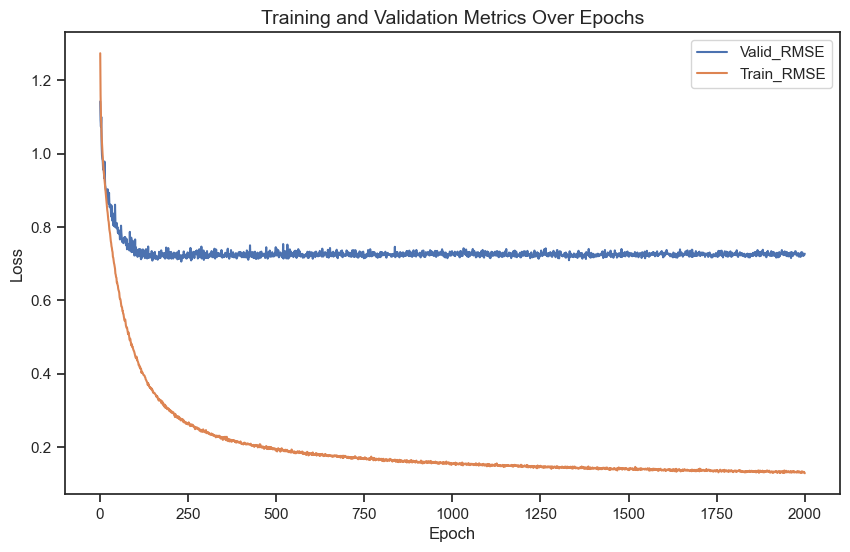

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')
# Load metrics

metrics = train_history

# Plot the training loss over epochs using seaborn
plt.figure(figsize=(10, 6))
# sns.lineplot(data=metrics, x='epoch', y='Train Loss', label='Train Loss')
# sns.lineplot(data=metrics, x='epoch', y='Val Loss', label='Val Loss')
sns.lineplot(data=metrics, x='epoch', y='Val MSE', label='Valid_RMSE')
sns.lineplot(data=metrics, x='epoch', y='Train MSE', label='Train_RMSE')
# sns.lineplot(data=metrics, x='Epoch', y='Valid_MAE', label='Valid_MAE')
# Add titles and labels
plt.title('Training and Validation Metrics Over Epochs', fontsize=14)
# Define the range of tick positions
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(False)
# Show the plot
plt.show()


In [32]:
train_history.tail()

,epoch,Train Loss,Train MSE,Train MAE,Train RMSE,Train R2,Train Pearson,Train Median_AE,Train Explained_VARVal Loss,Val MSE,Val MAE,Val RMSE,Val R2,Val Pearson,Val Median_AE,Val Explained_VAR,Train Explained_VAR,Val Loss
1995,1996,0.132855,0.132863,0.266695,0.266695,0.918238,0.958247,0.197947,NaN,0.724691,0.627470,0.627470,0.538485,0.739693,0.466563,0.538978,0.918238,0.724691
1996,1997,0.133134,0.133154,0.267454,0.267454,0.918058,0.958154,0.197658,NaN,0.726393,0.628307,0.628307,0.537402,0.739605,0.471394,0.537836,0.918059,0.726392
1997,1998,0.131027,0.131018,0.265757,0.265757,0.919373,0.958840,0.198530,NaN,0.722823,0.629877,0.629877,0.539675,0.737821,0.477254,0.540056,0.919373,0.722823
1998,1999,0.131605,0.131582,0.266023,0.266023,0.919026,0.958659,0.198009,NaN,0.725033,0.627821,0.627821,0.538268,0.740539,0.474635,0.538970,0.919027,0.725033
1999,2000,0.129329,0.129329,0.263815,0.263815,0.920412,0.959382,0.195274,NaN,0.727328,0.628394,0.628394,0.536806,0.740302,0.471746,0.536809,0.920412,0.727328


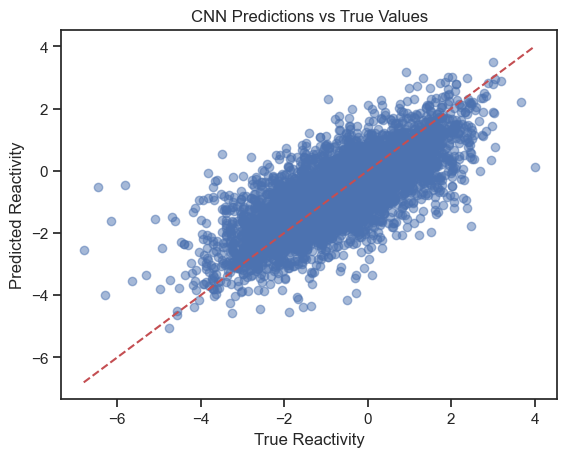

In [33]:
# Plot the performance
import matplotlib.pyplot as plt

plt.scatter(test_labels, test_predictions, alpha=0.5)
plt.xlabel("True Reactivity")
plt.ylabel("Predicted Reactivity")
plt.title("CNN Predictions vs True Values")
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], 'r--')
plt.show()
